In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.shape

(13320, 9)

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


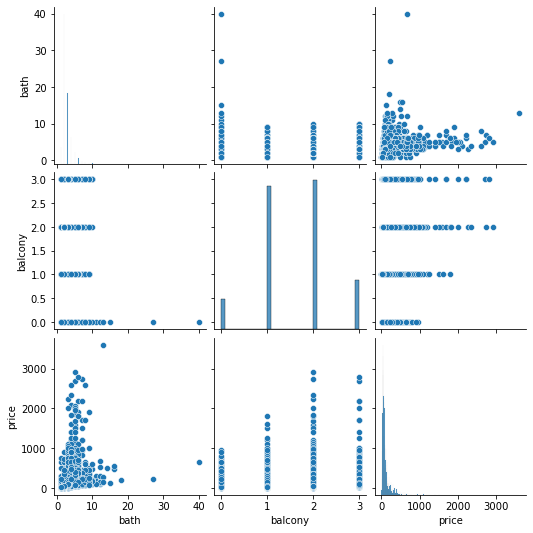

In [5]:
sns.pairplot(df)

In [6]:
# Unique value 

def unique_values(df):
    for var in df.columns:
        print(df[var].value_counts())
        print('---------------')

In [7]:
unique_values(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
---------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Jul               1
15-Aug               1
15-Dec               1
15-Jun               1
17-Jan               1
Name: availability, Length: 81, dtype: int64
---------------
Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
Thavarekere                    1
Xavier Layout                  1
High grounds                   1
Okalipura                      1
Electronic City Phase 1,       1
Name: location, Length: 1305, dtype: int64
---------------
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK  

<AxesSubplot:>

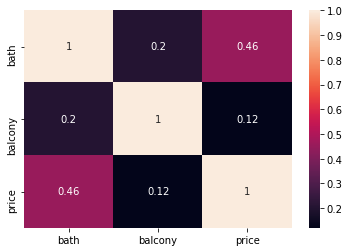

In [8]:
# Correlation b/t numerical variables

num_vars = ['bath','balcony','price']
sns.heatmap(df[num_vars].corr(),annot=True)

# corr of bath dataset is greater than corr of balcony 
# with price

## Prepare Data for ML Model 

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
# by percentage

df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<AxesSubplot:>

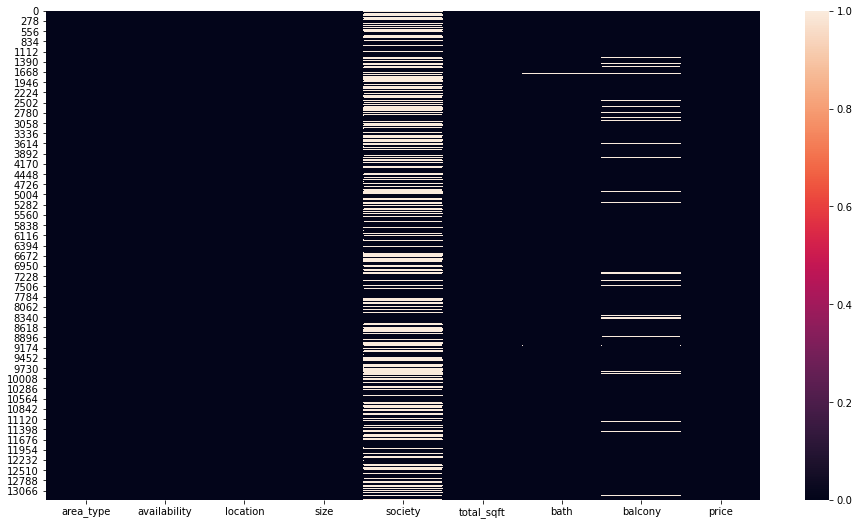

In [11]:
# Doing same with help of Visualization

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [12]:
# drop society feature

df2 = df.drop('society', axis=1)
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())


In [14]:
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [15]:
df3 = df2.dropna()
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Feature Engineering

In [16]:
# To show all the rows and columns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [17]:
df3.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

### Convert 'total_sqft' category feature in Numeric

In [18]:
df3['total_sqft'].value_counts()

# there are various feature, best stretegy is to convert it into
# it into number by splitting it

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1160                  60
1550                  60
1125                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
750                   52
700                   52
1175                  48
4000                  48
1225                  48


In [19]:
total_sqft_int = []
for  str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val))  # this converts str_val's value into float
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_int.append((float(temp[0]) + float(temp[-1]))/2) # this covert range value into avg value
        except:
            total_sqft_int.append(np.nan)  # if value not contain in above format than consider as a nan

In [20]:
# reset index of dataframe

df4 = df3.reset_index(drop=True)  # drop True- dont add index column in df

In [21]:
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [22]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [23]:
df6 = df5.dropna()
df6.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
dtype: int64

In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [25]:
df6['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
8 Bedroom       83
7 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
16 BHK           1
13 BHK           1
14 BHK           1
12 Bedroom       1
19 BHK           1
27 BHK           1
18 Bedroom       1
43 Bedroom       1
Name: size, dtype: int64

In [26]:
df6['size'] = df6['size'].astype(str)
df6['bhk'] = df6['size'].apply(lambda x: x.split(' ')[0])
df6['bhk'] = df6['bhk'].astype(int)
df6.head()

<ipython-input-26-1c2738691739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['size'] = df6['size'].astype(str)
<ipython-input-26-1c2738691739>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['bhk'] = df6['size'].apply(lambda x: x.split(' ')[0])
<ipython-input-26-1c2738691739>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [27]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
 9   bhk             13200 non-null  int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 1.1+ MB


In [28]:
df6 = df6.drop(['size','total_sqft'], axis =1)

In [29]:
df6.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2


## Finding Outliers & removing

In [30]:
# Function to create histogram, Q-Q plot and boxplot

# for Q-Q plot
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16,4))
    
    # histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable], bins = 30)
    plt.title('Histogram')
    
    # Q-Q Plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    plt.ylabel('Variable Quatiles')
    
    # boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y = df[variable])
    plt.title('BoxPlot')
    
    plt.show()
    

_______bath________


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


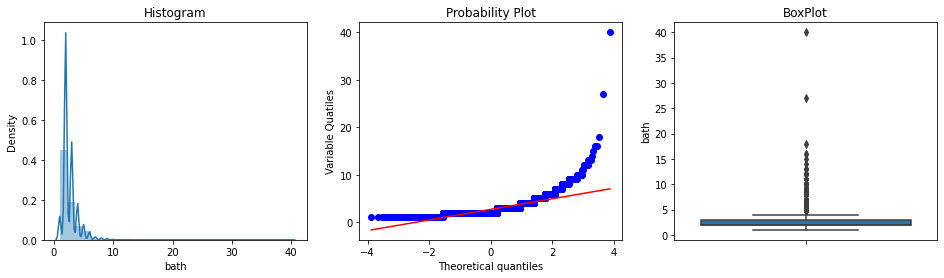

_______balcony________


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


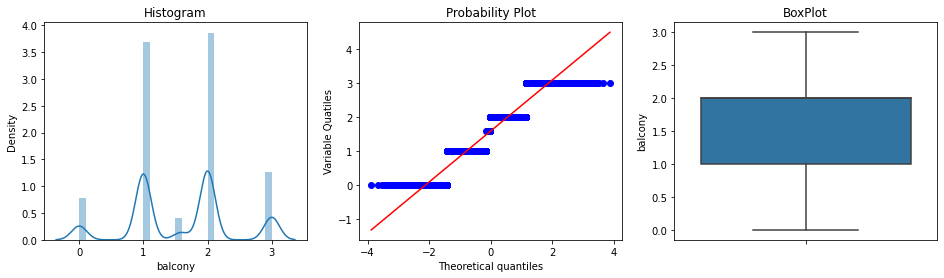

_______total_sqft_int________


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


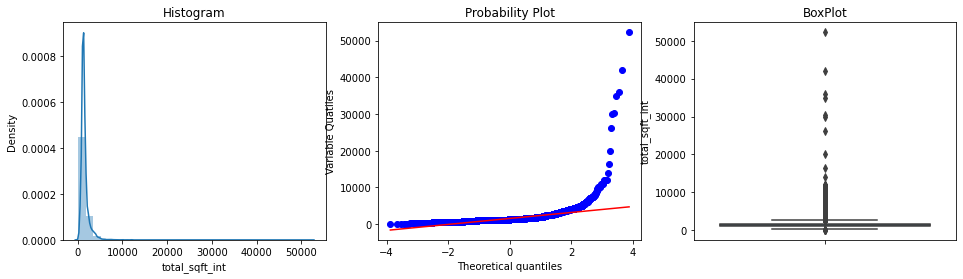

_______bhk________


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


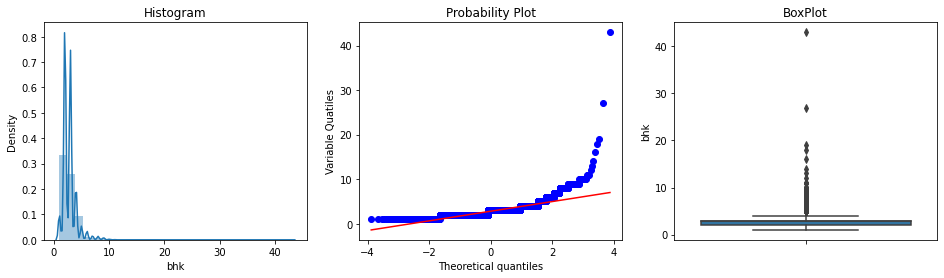

_______price________


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


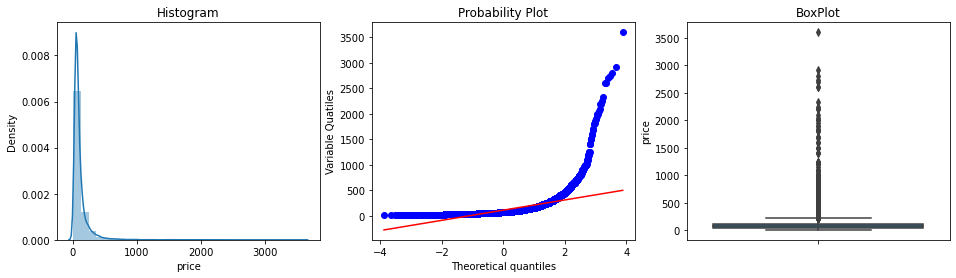

In [31]:
num_var = ['bath', 'balcony','total_sqft_int','bhk','price']
for var in num_var:
    print('_______{}________'.format(var))
    diagnostic_plots(df6, var)

In [32]:
# Here we consider 1 BHK required minimum 350 sqft :

df6[df6['total_sqft_int']/df6['bhk'] < 350].head()


,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,4.0,1.000000,150.0,1407.0,6


In [33]:
df6.shape

(13200, 8)

In [34]:
df7 = df6[df6['total_sqft_int']/df6['bhk'] > 350]
df7.shape

(12069, 8)

In [35]:
# Create new feature price per sqft
# price in lakh so convert into rupees and thn devide by total_sqft_int

df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft_int']
df7.head()

<ipython-input-35-1f4a4191b4e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft_int']


,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,1200.0,2,4250.000000


In [36]:
df7.price_per_sqft.describe()

count     12069.000000
mean       6185.186110
std        4019.686600
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6805.555556
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
# Remove Outlire w.r.t price per sqft taking std & mean per location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, value in df.groupby('location'):
        m = np.mean(value.price_per_sqft)
        sd = np.std(value.price_per_sqft)
        reduce_df = value[(value.price_per_sqft > (m-sd)) & (value.price_per_sqft < (m+sd))]
        df_out = pd.concat([df_out,reduce_df], ignore_index=True)
    return df_out

df8 = remove_pps_outliers(df7)
df8.shape

(8704, 9)

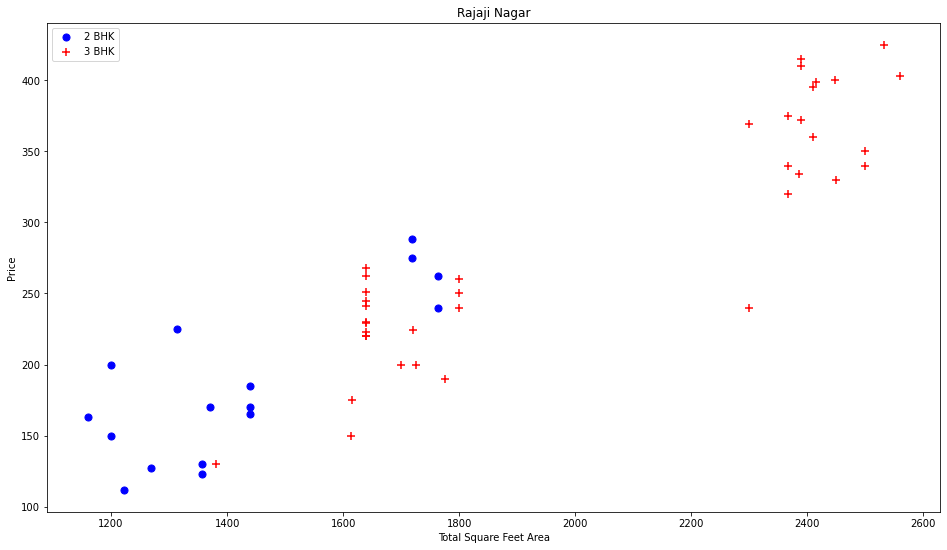

In [38]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
 
plot_scatter_chart(df8, "Rajaji Nagar")

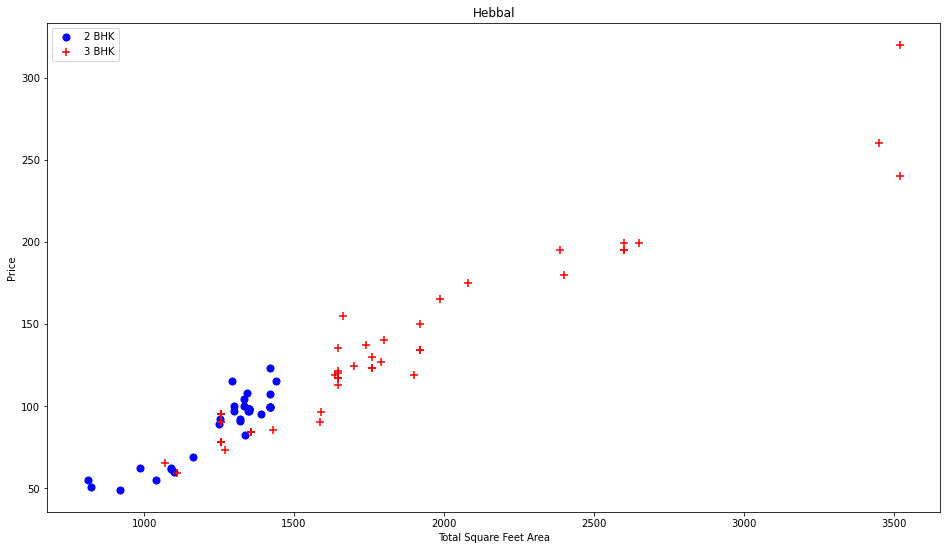

In [39]:
plot_scatter_chart(df8, "Hebbal")

In [40]:
# Removing BHK outliers

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
              'mean':np.mean(bhk_df.price_per_sqft),
              'std':np.std(bhk_df.price_per_sqft),
              'count':bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

                 
df9 = remove_bhk_outliers(df8)
df9.shape

(7023, 9)

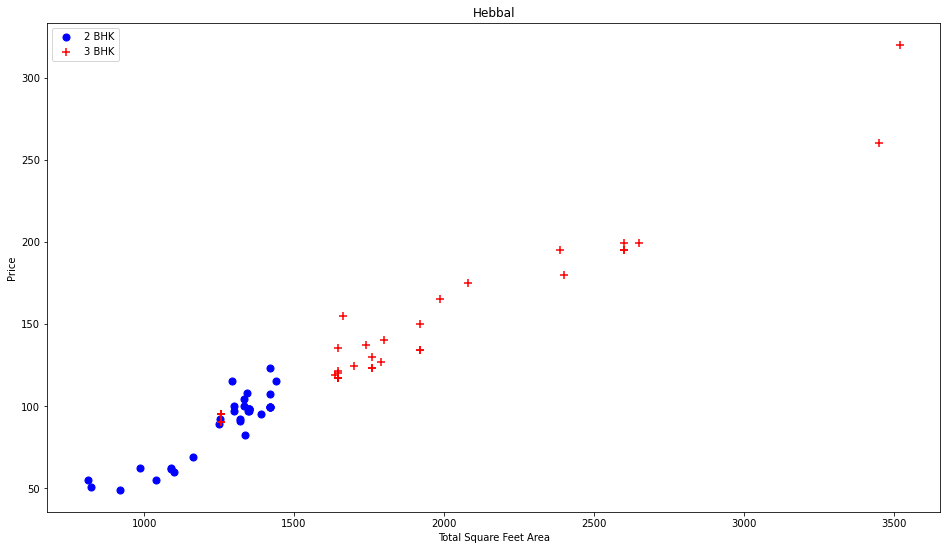

In [41]:
plot_scatter_chart(df9, "Hebbal")

In [42]:
# Remove Bathroom Outliers

df9['bath'].unique() #o/t - array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])
df9[df9['bath'] > df9['bhk']+2] # this is outlier

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1828,Built-up Area,Ready To Move,Chikkabanavar,7.0,2.000000,80.0,2460.0,4,3252.032520
5720,Built-up Area,Ready To Move,Nagasandra,8.0,1.584376,450.0,7000.0,4,6428.571429
6949,Super built-up Area,Ready To Move,Sathya Sai Layout,9.0,1.000000,1000.0,11338.0,6,8819.897689
7405,Super built-up Area,Ready To Move,Thanisandra,6.0,2.000000,116.0,1806.0,3,6423.034330


In [43]:
df10 = df9[df9['bath'] < df9['bhk']+2]
df10.shape

(6950, 9)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

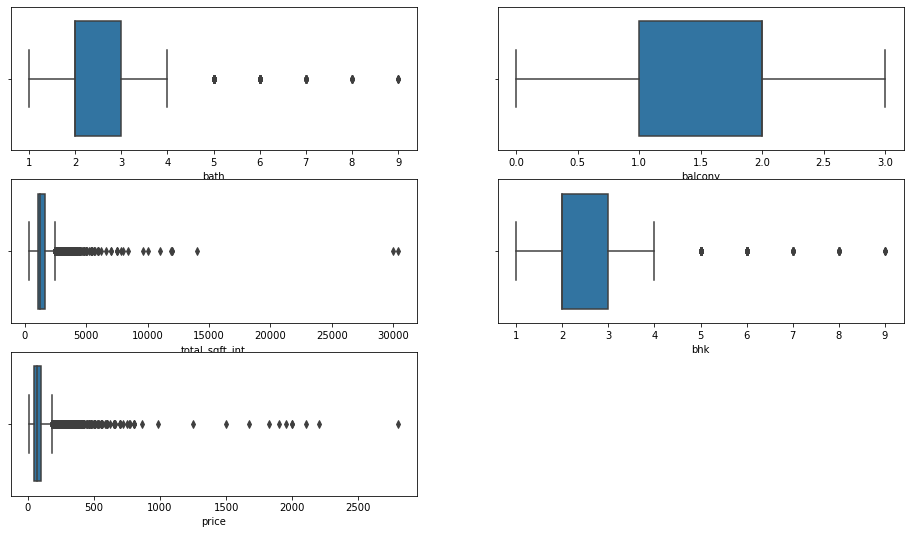

In [44]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df10[var])

In [45]:
df11 = df10.drop(['area_type','availability','location'], axis = 1)
df11.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


## Handle Categorical Features

In [46]:
df10.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [47]:
df12 = pd.get_dummies(df10, drop_first=True, columns = ['area_type','availability','location'])
df12.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Mysore Highway,location_ Thanisandra,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Narayanapura,location_BCC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Babusapalaya,location_Badavala Nagar,location_Bagalakunte,location_Bagalur,location_Bagalur Main Road,location_Balagere,location_Balaji Gardens Layout,location_Banagiri Nagar,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location

In [48]:
df12.shape

(6950, 693)

In [49]:
df10['area_type'].value_counts()

Super built-up  Area    5258
Built-up  Area          1257
Plot  Area               401
Carpet  Area              34
Name: area_type, dtype: int64

In [50]:
# Working on <<<<<< area_type >>>>> feature

df13 = df10.copy()

# Apply one-hot encodung on area-type feature

for cat_var in ['Super built-up  Area','Built-up  Area','Plot  Area']:
    df13['area_type '+cat_var] = np.where(df13['area_type'] == cat_var, 1, 0)
df13.shape    

(6950, 12)

In [51]:
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type Super built-up Area,area_type Built-up Area,area_type Plot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1


In [52]:
# Working on <<<<<< availability >>>>> feature

df10['availability'].value_counts()

Ready To Move    5502
18-Dec            158
18-May            152
18-Apr            151
18-Aug            117
19-Dec             99
18-Jul             76
18-Mar             70
20-Dec             52
18-Jun             50
21-Dec             50
19-Mar             48
18-Feb             36
18-Nov             26
18-Oct             24
19-Jun             24
20-Jan             18
19-Jan             18
18-Sep             18
18-Jan             16
17-Dec             14
21-Mar             13
17-Oct             13
21-Jun             13
19-Sep             12
19-Aug             11
19-Jul             11
17-Jul             10
19-Apr              9
17-Jun              9
21-Jan              9
20-Jun              7
19-Oct              7
22-Dec              7
21-Jul              6
17-Sep              6
17-May              6
20-Oct              5
20-Aug              5
20-Sep              5
21-Feb              5
20-Nov              4
22-Jan              4
17-Nov              4
17-Apr              4
17-Mar    

In [53]:
for cat_var in ['Ready To Move']:
    df13['availability '+cat_var] = np.where(df13['availability'] == cat_var, 1, 0)
df13.shape  

(6950, 13)

In [54]:
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type Super built-up Area,area_type Built-up Area,area_type Plot Area,availability Ready To Move
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1


In [55]:
# Working on <<<<<< location >>>>> feature

df10['location'].value_counts()

Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Marathahalli                           116
Haralur Road                           116
Raja Rajeshwari Nagar                  116
Hennur Road                            108
Bannerghatta Road                      108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          77
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Bellandur                               53
Kasavanhalli                            53
Begur Road                              51
Kothanur                                49
Banashankari                            49
Hormavu    

In [56]:
location_count = df10['location'].value_counts()

In [57]:
location_grt_20 = location_count[location_count >= 20].index
location_grt_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Marathahalli',
       'Haralur Road', 'Raja Rajeshwari Nagar', 'Hennur Road',
       'Bannerghatta Road', 'Uttarahalli', 'Thanisandra',
       'Electronic City Phase II', 'Hebbal', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Bellandur',
       'Kasavanhalli', 'Begur Road', 'Kothanur', 'Banashankari', 'Hormavu',
       'Harlur', 'Akshaya Nagar', 'Jakkur', 'Electronics City Phase 1',
       'Varthur', 'Chandapura', 'Hennur', 'HSR Layout', 'Koramangala',
       'Ramamurthy Nagar', 'Kundalahalli', 'Kaggadasapura', 'Ramagondanahalli',
       'Budigere', 'Hoodi', 'Hulimavu', 'Malleshwaram', 'Bisuvanahalli',
       '8th Phase JP Nagar', 'Yeshwanthpur', 'Hegde Nagar', 'Gottigere',
       'JP Nagar', 'Channasandra', 'Vittasandra', 'Indira Nagar',
       'Brookefield', 'Old Airport Road', 'Vijayanagar', 'Sahakara Nagar',
       'Kengeri', 'Hosa Road', 'Balagere', 'Bommasandra', 'Gr

In [58]:
df14 = df13.copy()
for cat_var in location_grt_20:
    df14['location '+cat_var] = np.where(df14['location'] == cat_var, 1, 0)
df14.shape 

(6950, 111)

In [59]:
df14.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type Super built-up Area,area_type Built-up Area,area_type Plot Area,availability Ready To Move,location Whitefield,location Sarjapur Road,location Electronic City,location Marathahalli,location Haralur Road,location Raja Rajeshwari Nagar,location Hennur Road,location Bannerghatta Road,location Uttarahalli,location Thanisandra,location Electronic City Phase II,location Hebbal,location Yelahanka,location 7th Phase JP Nagar,location Kanakpura Road,location KR Puram,location Sarjapur,location Rajaji Nagar,location Bellandur,location Kasavanhalli,location Begur Road,location Kothanur,location Banashankari,location Hormavu,location Harlur,location Akshaya Nagar,location Jakkur,location Electronics City Phase 1,location Varthur,location Chandapura,location Hennur,location HSR Layout,location Koramangala,location Ramamurthy Nagar,location Kundalahalli,location Kaggadasapura,location Ramagondanahalli,location Budigere,location Hoodi,location Hulimavu,location Malleshwaram,location Bisuvanahalli,location 8th Phase JP Nagar,location Yeshwanthpur,location Hegde Nagar,location Gottigere,location JP Nagar,location Channasandra,location Vittasandra,location Indira Nagar,location Brookefield,location Old Airport Road,location Vijayanagar,location Sahakara Nagar,location Kengeri,location Hosa Road,location Balagere,location Bommasandra,location Green Glen Layout,location Old Madras Road,location Panathur,location Kudlu Gate,location Rachenahalli,location Talaghattapura,location Jigani,location Mysore Road,location Kadugodi,location Ambedkar Nagar,location Thigalarapalya,location Attibele,location Dodda Nekkundi,location Kanakapura,location Frazer Town,location Devanahalli,location 5th Phase JP Nagar,location Lakshminarayana Pura,location Ananth Nagar,location Nagarbhavi,location TC Palaya,location Kudlu,location Jalahalli,location Kengeri Satellite Town,location Anekal,location CV Raman Nagar,location Yelahanka New Town,location Doddathoguru,location Kalena Agrahara,location Bhoganhalli,location Horamavu Agara,location Subramanyapura,location Hosur Road,location Hebbal Kempapura,location Vidyaranyapura,location BTM 2nd Stage,location Tumkur Road,location Mahadevpura,location Horamavu Banaswadi,location Domlur
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df15 = df14.drop(['area_type','availability','location'], axis = 1)
df15.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type Super built-up Area,area_type Built-up Area,area_type Plot Area,availability Ready To Move,location Whitefield,location Sarjapur Road,location Electronic City,location Marathahalli,location Haralur Road,location Raja Rajeshwari Nagar,location Hennur Road,location Bannerghatta Road,location Uttarahalli,location Thanisandra,location Electronic City Phase II,location Hebbal,location Yelahanka,location 7th Phase JP Nagar,location Kanakpura Road,location KR Puram,location Sarjapur,location Rajaji Nagar,location Bellandur,location Kasavanhalli,location Begur Road,location Kothanur,location Banashankari,location Hormavu,location Harlur,location Akshaya Nagar,location Jakkur,location Electronics City Phase 1,location Varthur,location Chandapura,location Hennur,location HSR Layout,location Koramangala,location Ramamurthy Nagar,location Kundalahalli,location Kaggadasapura,location Ramagondanahalli,location Budigere,location Hoodi,location Hulimavu,location Malleshwaram,location Bisuvanahalli,location 8th Phase JP Nagar,location Yeshwanthpur,location Hegde Nagar,location Gottigere,location JP Nagar,location Channasandra,location Vittasandra,location Indira Nagar,location Brookefield,location Old Airport Road,location Vijayanagar,location Sahakara Nagar,location Kengeri,location Hosa Road,location Balagere,location Bommasandra,location Green Glen Layout,location Old Madras Road,location Panathur,location Kudlu Gate,location Rachenahalli,location Talaghattapura,location Jigani,location Mysore Road,location Kadugodi,location Ambedkar Nagar,location Thigalarapalya,location Attibele,location Dodda Nekkundi,location Kanakapura,location Frazer Town,location Devanahalli,location 5th Phase JP Nagar,location Lakshminarayana Pura,location Ananth Nagar,location Nagarbhavi,location TC Palaya,location Kudlu,location Jalahalli,location Kengeri Satellite Town,location Anekal,location CV Raman Nagar,location Yelahanka New Town,location Doddathoguru,location Kalena Agrahara,location Bhoganhalli,location Horamavu Agara,location Subramanyapura,location Hosur Road,location Hebbal Kempapura,location Vidyaranyapura,location BTM 2nd Stage,location Tumkur Road,location Mahadevpura,location Horamavu Banaswadi,location Domlur
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
df15.to_csv('clean_data_home_price_predictor.csv', index = False)

# Model Building

In [62]:
df15.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type Super built-up Area,area_type Built-up Area,area_type Plot Area,availability Ready To Move,location Whitefield,location Sarjapur Road,location Electronic City,location Marathahalli,location Haralur Road,location Raja Rajeshwari Nagar,location Hennur Road,location Bannerghatta Road,location Uttarahalli,location Thanisandra,location Electronic City Phase II,location Hebbal,location Yelahanka,location 7th Phase JP Nagar,location Kanakpura Road,location KR Puram,location Sarjapur,location Rajaji Nagar,location Bellandur,location Kasavanhalli,location Begur Road,location Kothanur,location Banashankari,location Hormavu,location Harlur,location Akshaya Nagar,location Jakkur,location Electronics City Phase 1,location Varthur,location Chandapura,location Hennur,location HSR Layout,location Koramangala,location Ramamurthy Nagar,location Kundalahalli,location Kaggadasapura,location Ramagondanahalli,location Budigere,location Hoodi,location Hulimavu,location Malleshwaram,location Bisuvanahalli,location 8th Phase JP Nagar,location Yeshwanthpur,location Hegde Nagar,location Gottigere,location JP Nagar,location Channasandra,location Vittasandra,location Indira Nagar,location Brookefield,location Old Airport Road,location Vijayanagar,location Sahakara Nagar,location Kengeri,location Hosa Road,location Balagere,location Bommasandra,location Green Glen Layout,location Old Madras Road,location Panathur,location Kudlu Gate,location Rachenahalli,location Talaghattapura,location Jigani,location Mysore Road,location Kadugodi,location Ambedkar Nagar,location Thigalarapalya,location Attibele,location Dodda Nekkundi,location Kanakapura,location Frazer Town,location Devanahalli,location 5th Phase JP Nagar,location Lakshminarayana Pura,location Ananth Nagar,location Nagarbhavi,location TC Palaya,location Kudlu,location Jalahalli,location Kengeri Satellite Town,location Anekal,location CV Raman Nagar,location Yelahanka New Town,location Doddathoguru,location Kalena Agrahara,location Bhoganhalli,location Horamavu Agara,location Subramanyapura,location Hosur Road,location Hebbal Kempapura,location Vidyaranyapura,location BTM 2nd Stage,location Tumkur Road,location Mahadevpura,location Horamavu Banaswadi,location Domlur
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# To show all the rows and columns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [64]:
X = df15.drop('price', axis = 1)
Y = df15['price']
print(X.shape)
print(Y.shape)

(6950, 107)
(6950,)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=55)

## Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test  = sc.transform(X_test)

##### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [68]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [69]:
lr.fit(X_train, Y_train)
lr_score = lr.score(X_test, Y_test)  # gives 0.8147875259847442 accuracy
lr_rmse = rmse(Y_test, lr.predict(X_test))
lr_score,lr_rmse

(0.8147875259847442, 47.77321883058038)

In [77]:
# Lasso

lr_lasso.fit(X_train, Y_train)
lr_lasso_score = lr_lasso.score(X_test, Y_test)  # gives 0.8042928066337879
lr_lasso_rmse = rmse(Y_test, lr_lasso.predict(X_test))
lr_lasso_score,lr_lasso_rmse

(0.8042928059104028, 49.10806054047047)

In [71]:
# Ridge

lr_ridge.fit(X_train, Y_train)
lr_ridge_score = lr_ridge.score(X_test, Y_test)  # gives 0.8147834295330045
lr_rmse = rmse(Y_test, lr_ridge.predict(X_test))
lr_ridge_score,lr_rmse

(0.8147834295330045, 47.77374714165753)

In [72]:
# Support Vector Machine

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, Y_train)
svr_score = svr.score(X_test, Y_test)  # gives 0.2512725903812303
svr_rmse = rmse(Y_test, svr.predict(X_test))
svr_score,svr_rmse

(0.2512725903812305, 96.05307074173)

In [73]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
rfr_score = rfr.score(X_test, Y_test)  # gives 0.7150969190812873
rfr_rmse = rmse(Y_test, rfr.predict(X_test))
rfr_score,rfr_rmse

(0.7176355850257738, 58.98673652929725)

In [74]:
# XGBoost

import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, Y_train)
xgb_reg_score = xgb_reg.score(X_test, Y_test)  # gives 0.7150969190812873
xgb_reg_rmse = rmse(Y_test, xgb_reg.predict(X_test))
xgb_reg_score,xgb_reg_rmse

(0.8470921480529903, 43.40745073973923)

In [78]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))
 

                    Model     Score       RMSE
0       Linear Regression  0.814788  47.773747
1                   Lasso  0.804293  49.108061
2  Support Vector Machine  0.251273  96.053071
3           Random Forest  0.717636  58.986737
4                 XGBoost  0.847092  43.407451


## Cross Validation

In [79]:
# Accuracy when doing train

from sklearn.model_selection import KFold, cross_val_score
cvs = cross_val_score(xgb_reg, X_train, Y_train, cv = 10)
cvs, cvs.mean()

(array([0.99195628, 0.87510346, 0.98364693, 0.964411  , 0.98804936,
        0.98878509, 0.99668631, 0.99626214, 0.92697073, 0.96438895]),
 0.9676260262377774)

In [80]:
cvs_rfr = cross_val_score(rfr, X_train, Y_train, cv = 10)
cvs_rfr, cvs_rfr.mean()

(array([0.99732866, 0.81989803, 0.98850733, 0.95705789, 0.99756952,
        0.98840066, 0.99617657, 0.99232524, 0.91004283, 0.97925506]),
 0.9626561792220727)

In [88]:
list(X.columns)
 
# it help to get predicted value of hosue  by providing features value 
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):
 
    x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model
 
  # adding feature's value according to their column index
    x[0]=bath
    x[1]=balcony
    x[2]=total_sqft_int
    x[3]=bhk
    x[4]=price_per_sqft
 
    if "availability"=="Ready To Move":
        x[8]=1
 
    if 'area_type '+area_type in X.columns:
        area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
        x[area_type_index] =1
 
        #print(area_type_index)
 
    if 'location_'+location in X.columns:
        loc_index = np.where(X.columns=="location_"+location)[0][0]
        x[loc_index] =1
 
     #print(loc_index)
 
    #print(x)
 
    # feature scaling
    x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
    #print(x)
 
    return model.predict([x])[0] # return the predicted value by train XGBoost model
 


In [108]:
predict_house_price(model=lr, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")


IndexError: index 0 is out of bounds for axis 0 with size 0

In [107]:
list(X.columns)
# ##test sample
# #area_type  availability    location    bath    balcony price   total_sqft_int  bhk price_per_sqft
# #2  Super built-up Area Ready To Move   Devarabeesana Halli 3.0 2.0 150.0   1750.0  3   8571.428571
 
predict_house_price(model=lr, bath=3,balcony=2,total_sqft_int=1750,bhk=3,price_per_sqft=8571.428571,area_type="Super built-up",availability="Ready To Move",location="Devarabeesana Halli")
 
# ##test sample
# #area_type  availability    location    bath    balcony price   total_sqft_int  bhk price_per_sqft
# #1  Built-up Area   Ready To Move   Devarabeesana Halli 3.0 3.0 149.0   1750.0  3   8514.285714
# predict_house_price(model=xgb_tune2,bath=3,balcony=3,total_sqft_int=1750,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")
 
# """# Save model & load model"""
 
# import joblib
# # save model
# joblib.dump(xgb_tune2, 'bangalore_house_price_prediction_model.pkl')
# joblib.dump(rfr, 'bangalore_house_price_prediction_rfr_model.pkl')
 
# # load model
# bangalore_house_price_prediction_model = joblib.load("bangalore_house_price_prediction_model.pkl")
 
# # predict house price
# predict_house_price(bangalore_house_price_prediction_model,bath=3,balcony=3,total_sqft_int=150,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")


182.18661983490603

In [100]:
import joblib
# # save model
# joblib.dump(xgb_reg, 'bangalore_house_price_prediction_xgb_reg_model.pkl')
joblib.dump(lr, 'bangalore_house_price_prediction_lr_model.pkl')

['bangalore_house_price_prediction_lr_model.pkl']

In [106]:
# # load model
bangalore_house_price_prediction_model = joblib.load("bangalore_house_price_prediction_lr_model.pkl")
 
# # predict house price
predict_house_price(bangalore_house_price_prediction_model,bath=2,balcony=1,total_sqft_int=1031.0,bhk=2,price_per_sqft=5334.626576,area_type="Super built-up Area",availability="Ready To Move",location="Electronic City Phase II")


58.45987479389286

In [105]:
df15.sample(5)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type Super built-up Area,area_type Built-up Area,area_type Plot Area,availability Ready To Move,location Whitefield,location Sarjapur Road,location Electronic City,location Marathahalli,location Haralur Road,location Raja Rajeshwari Nagar,location Hennur Road,location Bannerghatta Road,location Uttarahalli,location Thanisandra,location Electronic City Phase II,location Hebbal,location Yelahanka,location 7th Phase JP Nagar,location Kanakpura Road,location KR Puram,location Sarjapur,location Rajaji Nagar,location Bellandur,location Kasavanhalli,location Begur Road,location Kothanur,location Banashankari,location Hormavu,location Harlur,location Akshaya Nagar,location Jakkur,location Electronics City Phase 1,location Varthur,location Chandapura,location Hennur,location HSR Layout,location Koramangala,location Ramamurthy Nagar,location Kundalahalli,location Kaggadasapura,location Ramagondanahalli,location Budigere,location Hoodi,location Hulimavu,location Malleshwaram,location Bisuvanahalli,location 8th Phase JP Nagar,location Yeshwanthpur,location Hegde Nagar,location Gottigere,location JP Nagar,location Channasandra,location Vittasandra,location Indira Nagar,location Brookefield,location Old Airport Road,location Vijayanagar,location Sahakara Nagar,location Kengeri,location Hosa Road,location Balagere,location Bommasandra,location Green Glen Layout,location Old Madras Road,location Panathur,location Kudlu Gate,location Rachenahalli,location Talaghattapura,location Jigani,location Mysore Road,location Kadugodi,location Ambedkar Nagar,location Thigalarapalya,location Attibele,location Dodda Nekkundi,location Kanakapura,location Frazer Town,location Devanahalli,location 5th Phase JP Nagar,location Lakshminarayana Pura,location Ananth Nagar,location Nagarbhavi,location TC Palaya,location Kudlu,location Jalahalli,location Kengeri Satellite Town,location Anekal,location CV Raman Nagar,location Yelahanka New Town,location Doddathoguru,location Kalena Agrahara,location Bhoganhalli,location Horamavu Agara,location Subramanyapura,location Hosur Road,location Hebbal Kempapura,location Vidyaranyapura,location BTM 2nd Stage,location Tumkur Road,location Mahadevpura,location Horamavu Banaswadi,location Domlur
1339,1.0,1.0,22.50,540.0,1,4166.666667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1713,1.0,1.0,16.45,645.0,1,2550.387597,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2486,2.0,1.0,55.00,1031.0,2,5334.626576,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3480,2.0,1.0,78.00,1400.0,2,5571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,2.0,0.0,43.49,1242.5,2,3500.201207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
